# Redes neuronales profundas (DNN)

## 1. Dataset

In [1]:
import tensorflow as tf
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test,y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [2]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [17]:
# Separamos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, train_size=0.85)

In [21]:
# Normalizamos
x_train, x_valid = x_train/255.0, x_valid/255.0

## 2. Red neuronal

### Modelo

In [3]:
from tensorflow.keras import layers, Sequential

In [22]:
model = Sequential()
model.add(layers.Flatten(input_shape=(28,28)))
model.add(layers.BatchNormalization())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(10, activation='softmax'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 batch_normalization_1 (Batc  (None, 256)              1024      
 hNormalization)                                        

### Optimizador

In [7]:
from tensorflow.keras import optimizers
optimizer = optimizers.Adam()

### Callbacks

In [8]:
from tensorflow.keras import callbacks

In [12]:
cb1 = callbacks.EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True)
cb2 = callbacks.ModelCheckpoint('./modelos/model.h5',monitor='val_loss', save_best_only=True)

### Compilacion y entrenamiento

In [23]:
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['acc'])

In [24]:
history = model.fit(x_train, y_train, batch_size=128, epochs=25, 
                    validation_data=(x_valid,y_valid), callbacks=[cb1,cb2])

Epoch 1/25
399/399 [==============================] - 7s 15ms/step - loss: 0.4768 - acc: 0.8269 - val_loss: 0.3821 - val_acc: 0.8572
Epoch 2/25
399/399 [==============================] - 6s 14ms/step - loss: 0.3485 - acc: 0.8697 - val_loss: 0.3299 - val_acc: 0.8784
Epoch 3/25
399/399 [==============================] - 6s 14ms/step - loss: 0.3093 - acc: 0.8853 - val_loss: 0.3290 - val_acc: 0.8809
Epoch 4/25
399/399 [==============================] - 6s 14ms/step - loss: 0.2811 - acc: 0.8960 - val_loss: 0.3179 - val_acc: 0.8833
Epoch 5/25
399/399 [==============================] - 6s 14ms/step - loss: 0.2603 - acc: 0.9025 - val_loss: 0.3120 - val_acc: 0.8860
Epoch 6/25
399/399 [==============================] - 5s 14ms/step - loss: 0.2419 - acc: 0.9092 - val_loss: 0.3169 - val_acc: 0.8854
Epoch 7/25
399/399 [==============================] - 6s 15ms/step - loss: 0.2297 - acc: 0.9139 - val_loss: 0.3399 - val_acc: 0.8798
Epoch 8/25
399/399 [==============================] - 6s 14ms/step - 

### Grafica

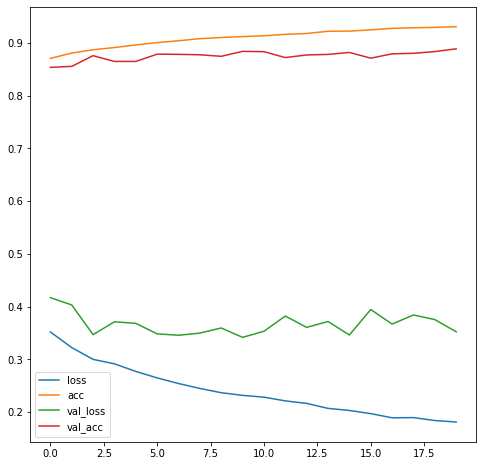

In [15]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8,8))